## Importing all the necessary libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


## Loading the dataset

In [2]:
# laod the dataset
# Reference: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download 
df = pd.read_csv("Mall_Customers.csv")
df.shape

(200, 5)

## Exploratory Data Analysis

In [3]:
# Checking first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### - Handling NULL values

In [4]:
# Checking NULL values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* Here the number of null values in each coloumn is zero

In [5]:
# dropping null values if there are any
df = df.dropna()
df.shape

(200, 5)

In [6]:
# Print coloumn names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### - Converting into numeric vales for categorical data

In [7]:
# Descriptive statistics for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# mapping male and female to a numeric value
df["Gender"] = df["Gender"].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


### - Descritive statistics for all the numeric columns

In [9]:
# Descriptive analysis for the customers dataset
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


### - Identifying the outliers

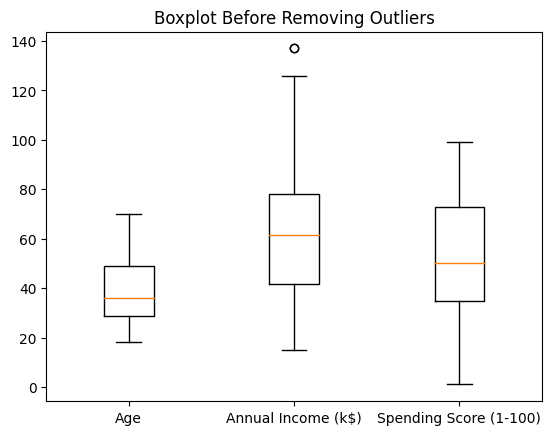

In [10]:
# Creating boxplot before removing outliers
plt.boxplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values, labels=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title("Boxplot Before Removing Outliers")
plt.show()

### - Removing outliers using IQR method

In [11]:
# Removing Outliers from the dataset using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

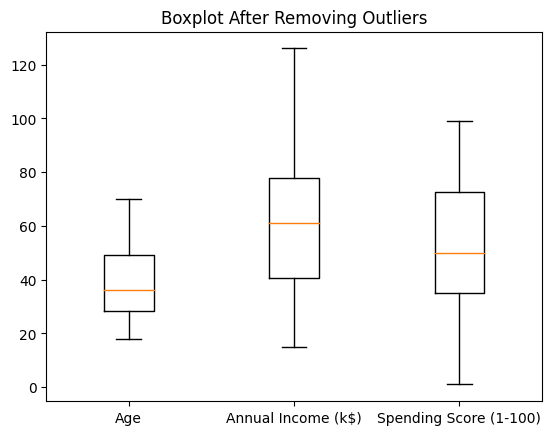

In [12]:
# Creating boxplot before removing outliers
plt.boxplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values, labels=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title("Boxplot After Removing Outliers")
plt.show()

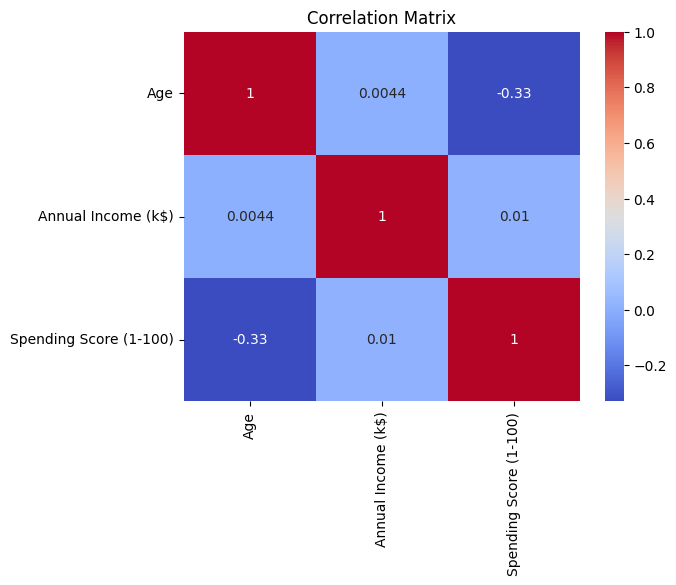

In [13]:
# Calculate correlation matrix
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Display correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Heatmap to visualize the correlation between numerical features in the dataset

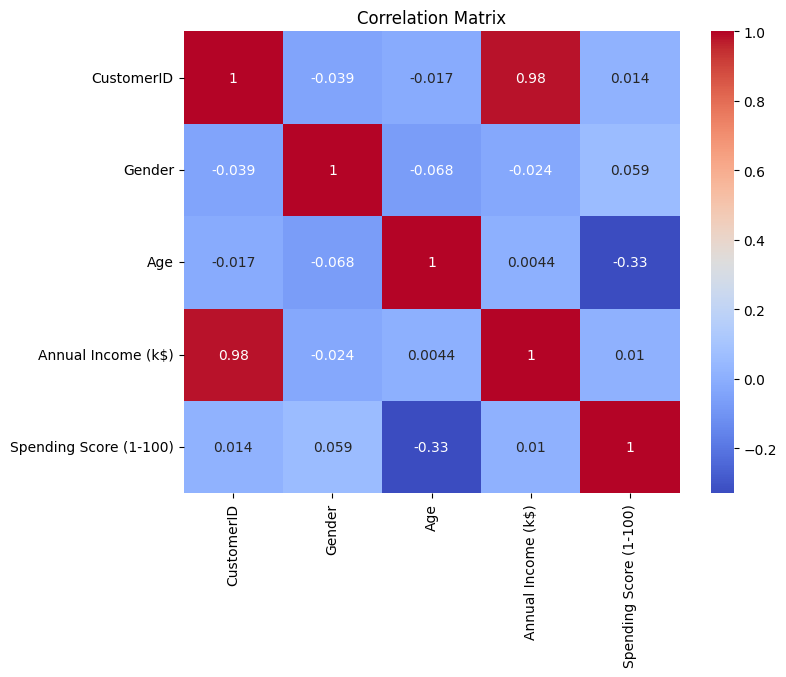

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Scatter plot to see the relationship between any two numerical features in the dataset

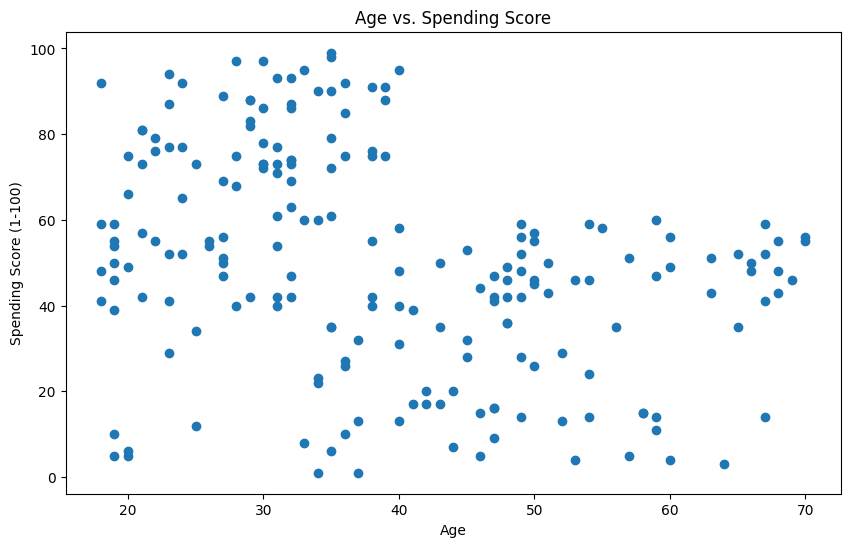

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df["Age"], df["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Age vs. Spending Score")
plt.show()


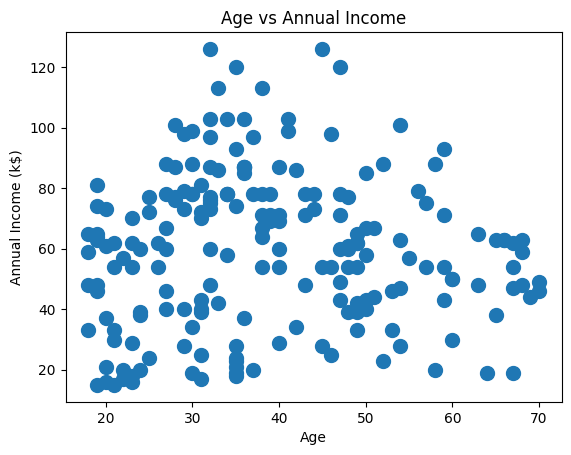

In [16]:
plt.scatter(df['Age'], df['Annual Income (k$)'], s=100)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.show()


### Distribution of a numerical feature across different categories

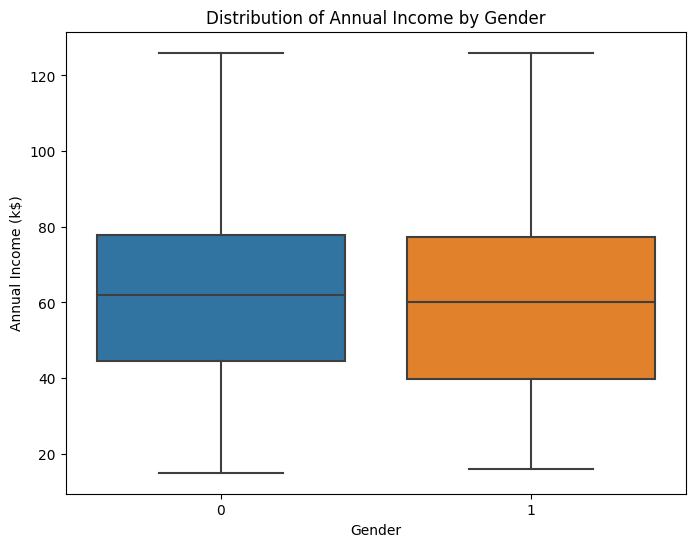

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Distribution of Annual Income by Gender')
plt.show()


### Pair plot to see the distribution of all numerical features in the dataset and also to see the relationship between them

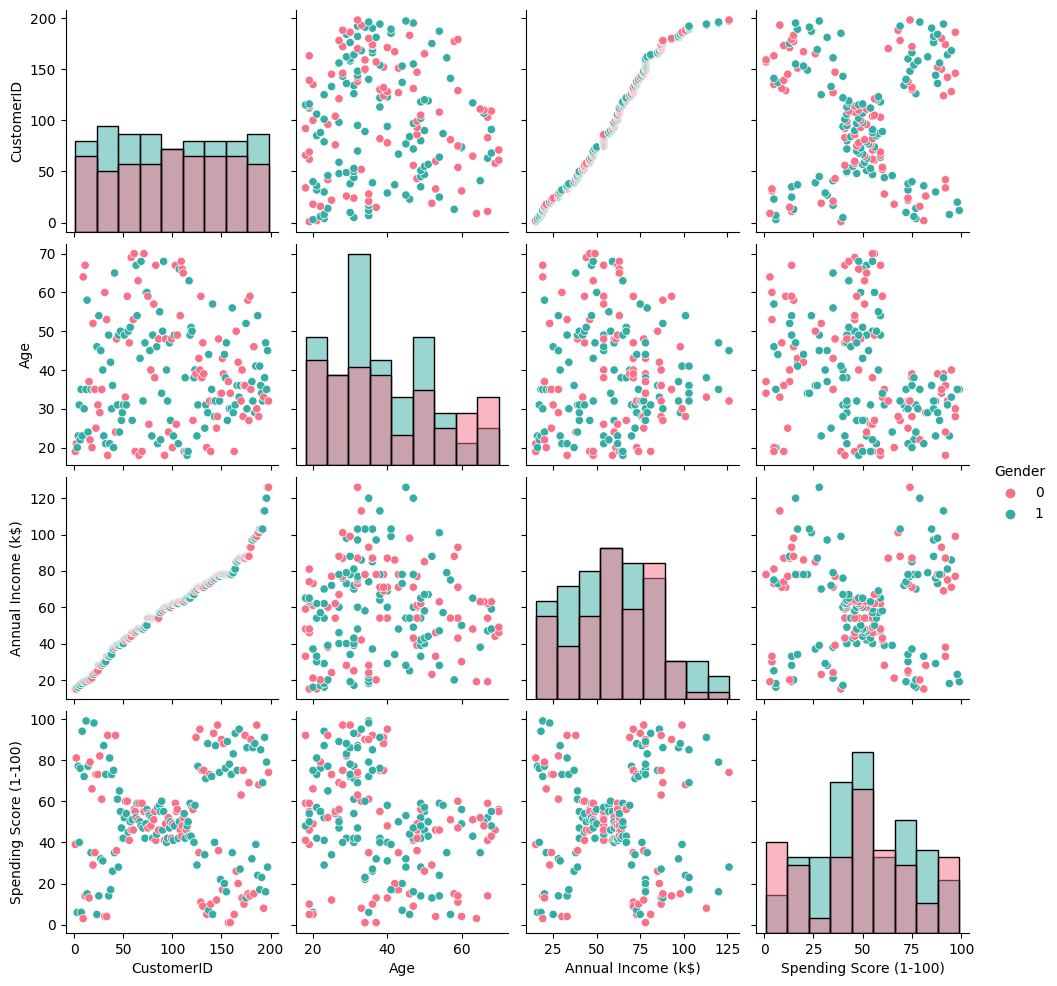

In [18]:
sns.pairplot(df, hue='Gender', diag_kind='hist', palette='husl')
plt.show()


### Value counts for Male and Female

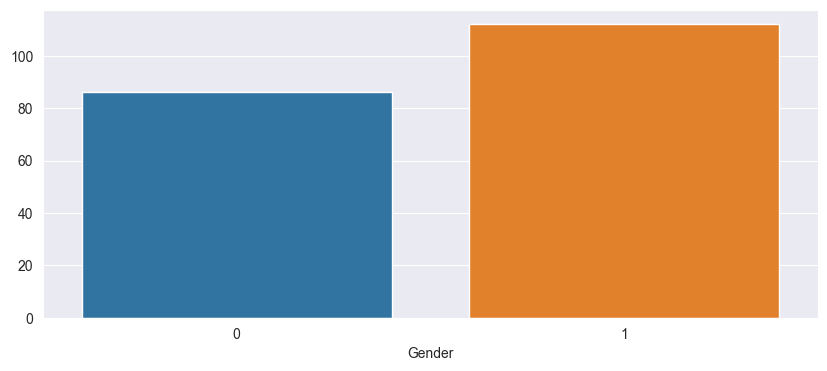

In [19]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

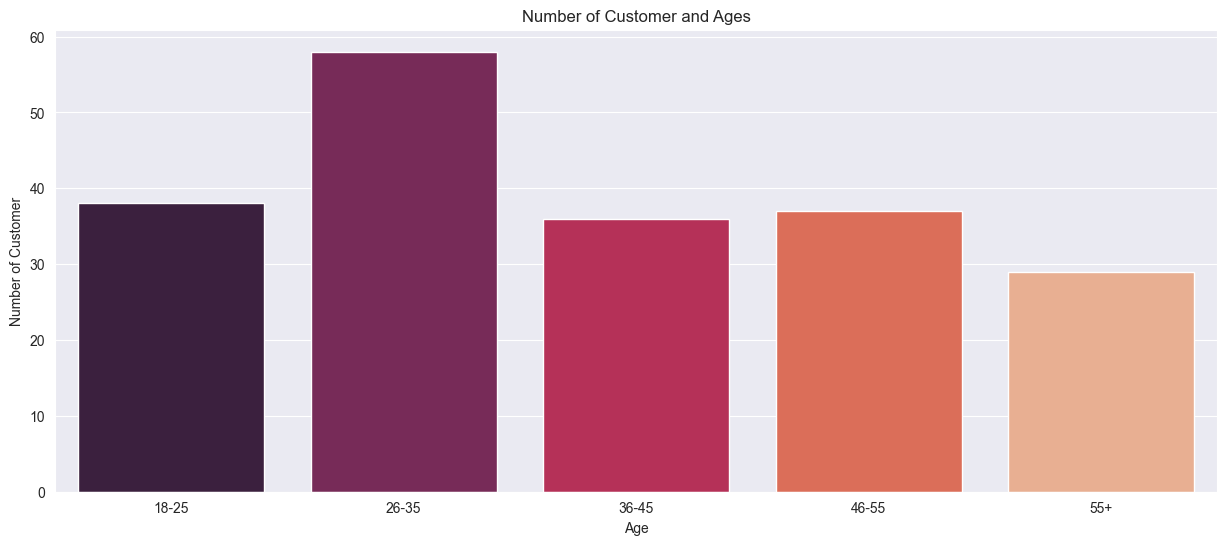

In [20]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

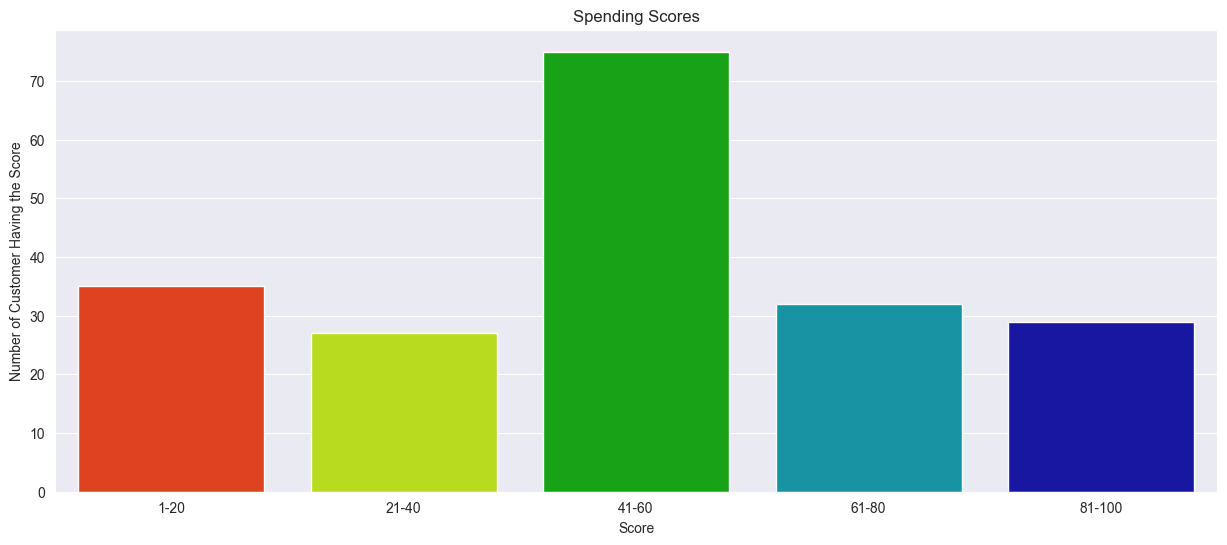

In [21]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

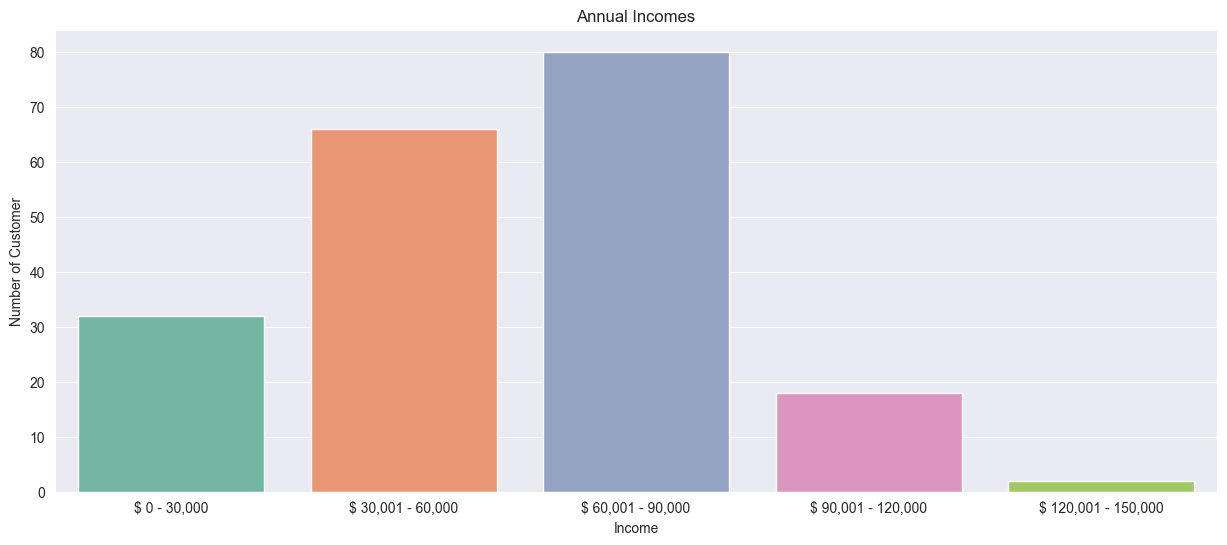

In [22]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

### Distribution of annual income and spending score


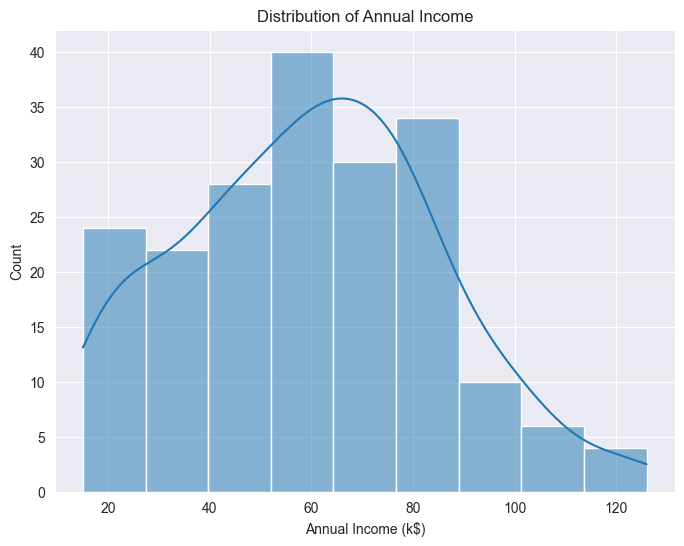

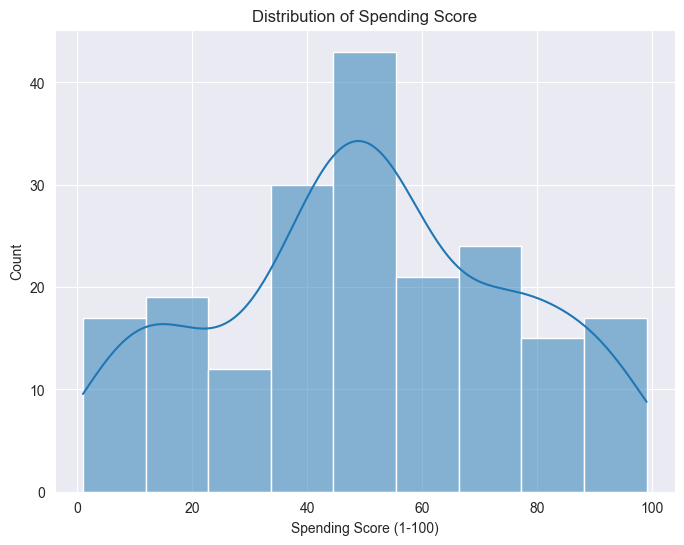

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Annual Income (k$)', kde=True)
plt.title('Distribution of Annual Income')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Spending Score (1-100)', kde=True)
plt.title('Distribution of Spending Score')
plt.show()

### Scatter plot to see the relationship between annual income and spending score

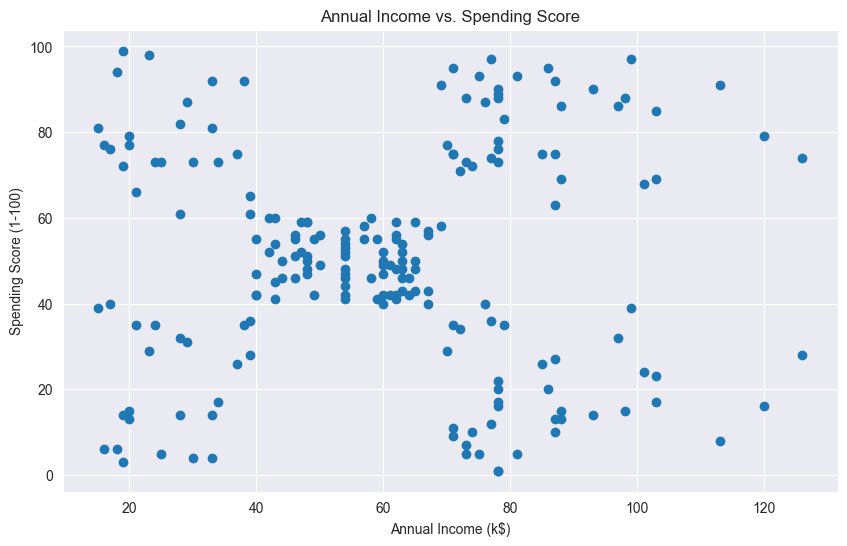

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.show()

### Bar plot to show the count of customers in each age group for male and female

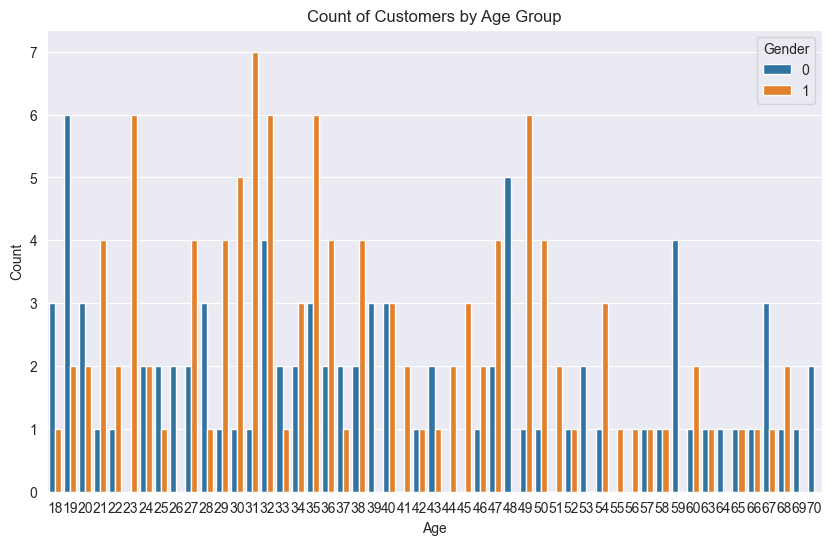

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age', hue='Gender')
plt.title('Count of Customers by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Box plot to visualize the distribution of annual income for each age group

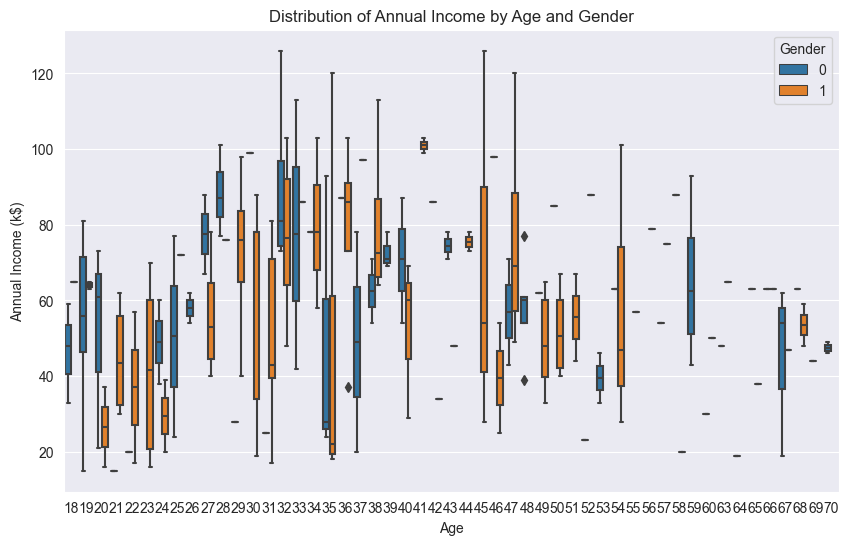

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender')
plt.title('Distribution of Annual Income by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


### Pie chart to show the percentage of male and female customers

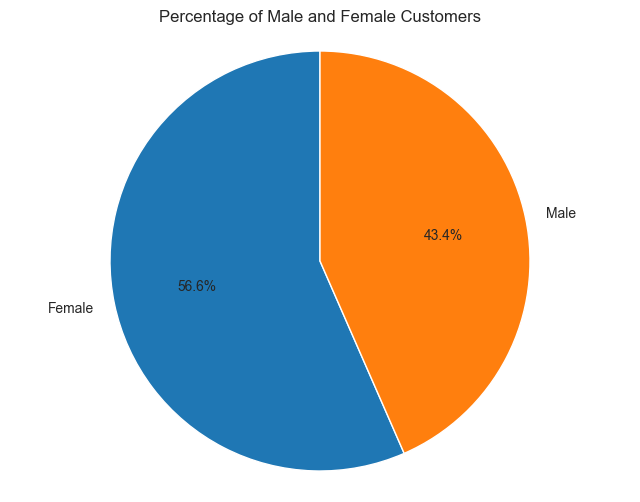

In [27]:
plt.figure(figsize=(8,6))
labels = ['Female', 'Male']
sizes = df['Gender'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Male and Female Customers')
plt.axis('equal')
plt.show()

### Violin plot to visualize the distribution of spending score for each age group

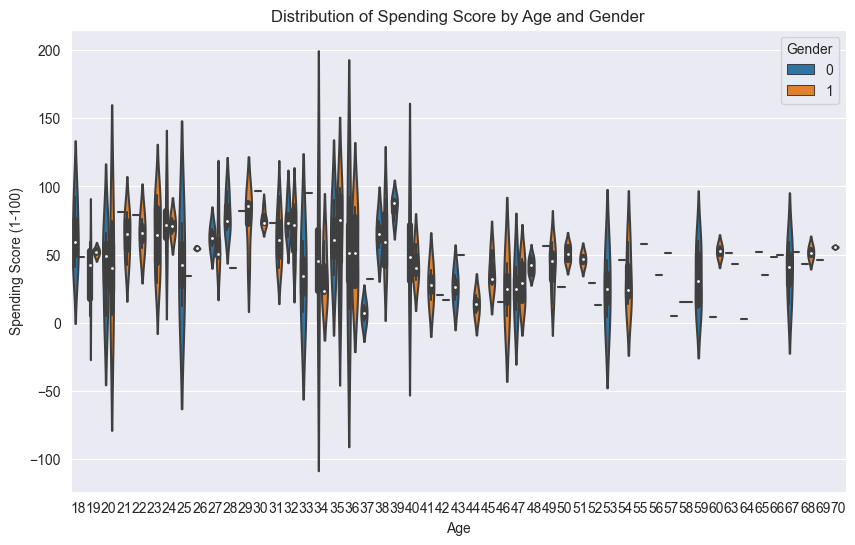

In [28]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Distribution of Spending Score by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


### Bar chart to show the average spending score of male and female customers

/var/folders/wl/mz0zjff12wjf2879mp01wb140000gn/T/ipykernel_15783/2650712643.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Spending Score (1-100)', data=df, ci=None)


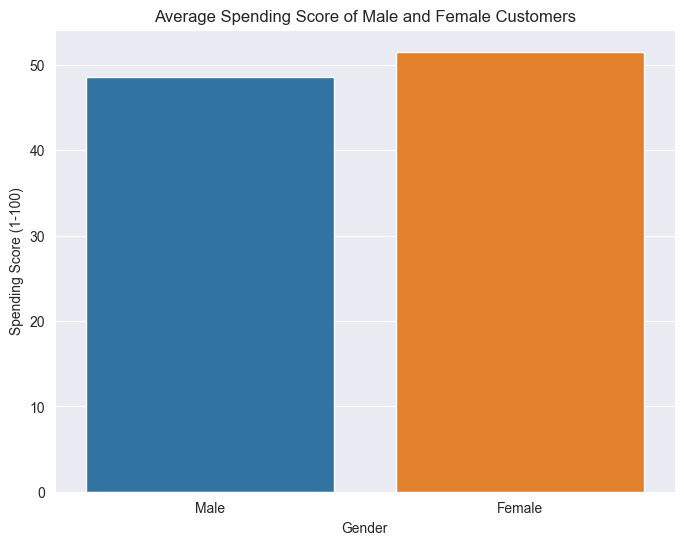

In [114]:
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Spending Score (1-100)', data=df, ci=None)
plt.title('Average Spending Score of Male and Female Customers')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Hierarchical clustering

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc.fit(X_train)

/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
y_pred_hc = hc.fit_predict(X_test)

/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
accuracy_hc = accuracy_score(y_test, y_pred_hc)
precision_hc = precision_score(y_test, y_pred_hc, average='weighted')
recall_hc = recall_score(y_test, y_pred_hc, average='weighted')
f1_hc = f1_score(y_test, y_pred_hc, average='weighted')

print('Accuracy (HC):', str(accuracy_hc*100) + '%')
print('Precision (HC):', precision_hc)
print('Recall (HC):', recall_hc)
print('F1-score (HC):', f1_hc)

Accuracy (HC): 67.5%
Precision (HC): 0.6302631578947369
Recall (HC): 0.675
F1-score (HC): 0.6513888888888888


## Clustering using DBSCAN

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(X_train)

DBSCAN(eps=3, min_samples=2)

In [ ]:
y_pred_dbscan = dbscan.fit_predict(X_test)

In [ ]:
accuracy_dbscan = accuracy_score(y_test, y_pred_dbscan)
precision_dbscan = precision_score(y_test, y_pred_dbscan, average='weighted')
recall_dbscan = recall_score(y_test, y_pred_dbscan, average='weighted')
f1_dbscan = f1_score(y_test, y_pred_dbscan, average='weighted')

/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy (DBSCAN):', str(accuracy_dbscan*100) + '%')
print('Precision (DBSCAN):', precision_dbscan)
print('Recall (DBSCAN):', recall_dbscan)
print('F1-score (DBSCAN):', f1_dbscan)

Accuracy (DBSCAN): 5.0%
Precision (DBSCAN): 0.425
Recall (DBSCAN): 0.05
F1-score (DBSCAN): 0.0894736842105263


## Clustering using Guassian Mixture

In [ ]:
# Fitting GMM model on training data
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(X_train)

# Making predictions on testing data
y_pred = gmm.predict(X_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print('Accuracy:', str(accuracy*100) + '%')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)





Accuracy: 75.0%
Precision: 0.73
Recall: 0.75
F1-score: 0.7388888888888889


## Clustering using OPTICS

In [ ]:
# Fitting OPTICS model on training data
optics = OPTICS(min_samples=5, xi=0.05)
optics.fit(X_train)

# Making predictions on testing data
y_pred = optics.fit_predict(X_test)

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print('Accuracy:', str(accuracy*100) + '%')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 67.5%
Precision: 0.6513888888888888
Recall: 0.675
F1-score: 0.6628571428571428


/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Training KNN model

### - Checking how many clusters are needed using ELBOW Method

/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

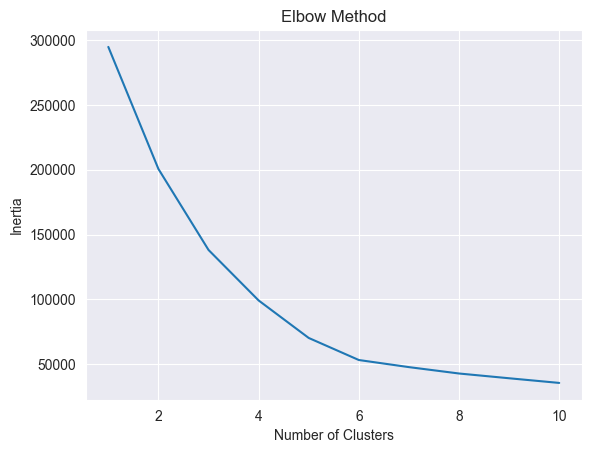

In [ ]:
# Selecting the relevant columns for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initializing an empty list to store the inertia values for different numbers of clusters
inertia = []

# Trying out different values of k from 1 to 10 and calculating the inertia for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the inertia values against different values of k
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### - Kmeans clustering using 5 clusters

In [ ]:
# Selecting the relevant columns for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Creating a KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fitting the model to the data and getting the cluster labels
clusters = kmeans.fit_predict(X)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


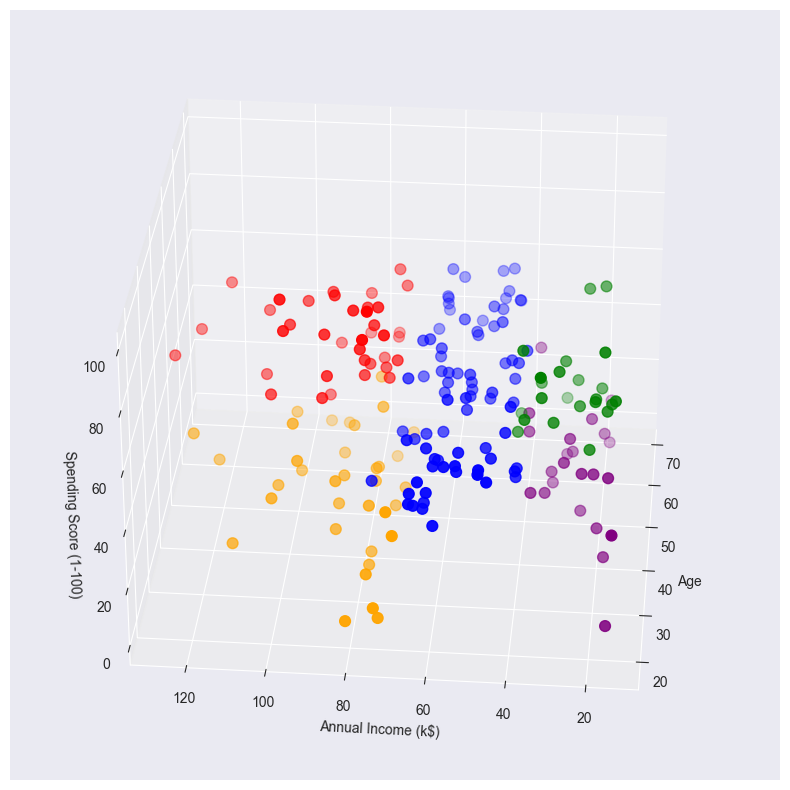

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income (k$)"][df.Cluster == 0], df["Spending Score (1-100)"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income (k$)"][df.Cluster == 1], df["Spending Score (1-100)"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income (k$)"][df.Cluster == 2], df["Spending Score (1-100)"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income (k$)"][df.Cluster == 3], df["Spending Score (1-100)"][df.Cluster == 3], c='orange', s=60)
ax.scatter(df.Age[df.Cluster == 4], df["Annual Income (k$)"][df.Cluster == 4], df["Spending Score (1-100)"][df.Cluster == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [69]:
# Separating predictors and target variable
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df[['Cluster']]

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting KNN model on training data
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Making predictions on testing data
y_pred = knn.predict(X_test)

/Users/today/SEM - 2/vasista/.venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [70]:
# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print('Accuracy:', str(accuracy*100) + '%')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 97.5%
Precision: 0.976388888888889
Recall: 0.975
F1-score: 0.9739682539682539


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         4
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         4

    accuracy                           0.97        40
   macro avg       0.99      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



In [30]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[17  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  4  0  0]
 [ 1  0  0  4  0]
 [ 0  0  0  0  4]]


In [ ]:
Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 
https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d 
Pandas Documentation: https://pandas.pydata.org/docs/
NumPy Documentation: https://numpy.org/doc/
Seaborn Documentation: https://seaborn.pydata.org/
Matplotlib Documentation: https://matplotlib.org/stable/contents.html
Scipy Documentation: https://docs.scipy.org/doc/
Scikit-learn Documentation: https://scikit-learn.org/stable/documentation.html